### Copyright 2021-2023 Jens Liebehenschel, Frankfurt University of Applied Sciences, FB2, Computer Science
### No liability or warranty; only for educational and non-commercial purposes
### See some basic hints for working with Jupyter notebooks in README.md
## Data structure queue and its visualization

## Constants and global variables

In [1]:
# maximal size of the queue
MAX_NUM_ELEMENTS = 10
# the queue and the index of the head and next tail elements, if not empty
# head: next element to dequeue
# tail: next free space for element to enqueue
# q contains the elements using a circulary implementation
# it is necessary to have space for one more element, otherwise distinction between empty and full is not possible
q = [-1]*(MAX_NUM_ELEMENTS+1)
head = 0
tail = 0

## Functions

In [2]:
def is_empty():
    global head, tail
    return head == tail

In [3]:
def is_full():
    global head, tail
    return head == (tail+1) % (MAX_NUM_ELEMENTS+1)

In [4]:
def enqueue(element):
    global q, head, tail
    if is_full():
        print("Queue is full, enqueue not possible.")
    else:
        q[tail] = element
        new_states = steps[-1][0][:]
        new_states[tail] = USED
        tail = (tail+1) % (MAX_NUM_ELEMENTS+1)
        new_states[tail] = NEXT_FREE_SPACE
        steps.append([new_states, q[:]+[head,tail]])

In [5]:
def dequeue():
    global q, head, tail
    if is_empty():
        print("Queue is empty, dequeue not possible.")
        return None
    else:
        new_states = steps[-1][0][:]
        new_states[head] = UNUSED
        head = (head+1) % (MAX_NUM_ELEMENTS+1)
        steps.append([new_states, q[:]+[head,tail]])
        return q[(head+MAX_NUM_ELEMENTS) % (MAX_NUM_ELEMENTS+1)] # can be done only when we have the memory under control

In [6]:
# helper functions
def init_queue():
    global q, head, tail, steps
    q = [-1]*(MAX_NUM_ELEMENTS+1)
    head = 0
    tail = 0
    steps = []
    steps.append([[NEXT_FREE_SPACE]+[UNUSED]*(MAX_NUM_ELEMENTS), q[:]+[head,tail]])
def print_queue():
    global q, head, tail
    if tail >= head:
        print(q[head:tail])
    else:
        print(q[head:]+q[:tail])
def print_queue_details():
    global q, head, tail
    # this functions discloses implementation details
    print("### q =", q)
    print("### head , tail =", head, ",", tail)

## Constants for visualization

In [7]:
# change output colors here
COL_USED = 'yellowgreen'
COL_UNUSED = 'lightgray'
COL_NEXT = 'skyblue'
COL_FULL = 'tomato'
COL_HORIZ_LINES = 'lightgray'
COL_LAST_HORIZ_LINE = 'k'

# offset for matching array index and y-axis description in output
OFFSET = 0.5

# number of ticks on axes
NUM_X_TICKS = 10
NUM_Y_TICKS = 10

# graphical output: width of bars and size of fonts - two settings are given here
# use for good readability of fewer sorting steps, e.g. 20-30
#BAR_WIDTH = 20
#FONTSIZE_LEGEND = 20
#FONTSIZE_ELEMENTS = 24
#FONTSIZE_AXES = 24
#FONTSIZE_AXES_LEGEND = 20
# use for good readability of more sorting steps, e.g. 80-100
BAR_WIDTH = 8
FONTSIZE_LEGEND = 14
FONTSIZE_ELEMENTS = 14
FONTSIZE_AXES = 14
FONTSIZE_AXES_LEGEND = 14

## Helper functions for visualization

In [8]:
def plot_values(x, y_vals, a):
    for y in y_vals:
        plt.text(x, y, a[y], verticalalignment='center_baseline', horizontalalignment='center', fontsize=FONTSIZE_ELEMENTS)

def plot_states(x, states, a):
    # colors
    for y in range(MAX_NUM_ELEMENTS+1):
        plt.plot([x,x],[y-OFFSET, y+OFFSET], COLORS[states[y]][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    # values
    plot_values(x, range(MAX_NUM_ELEMENTS+1), a)

def plot_interval(x, y_vals, col, thick_lines = True):
    if thick_lines:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col, linewidth=BAR_WIDTH, solid_capstyle="butt")
    else:
        plt.plot([x,x],[y_vals[0]-OFFSET, y_vals[1]+OFFSET], col)

## Output graphical view

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 12]

def output_graphical_view(MAX_NUM_ELEMENTS):
    global steps, head, tail

    # format graph
    plt.xticks(range(0, len(steps)+1, max(1,len(steps)//NUM_X_TICKS)), fontsize=FONTSIZE_AXES)
    plt.yticks(range(0, MAX_NUM_ELEMENTS+3, max(1,MAX_NUM_ELEMENTS//NUM_Y_TICKS)), fontsize=FONTSIZE_AXES)
    plt.axis([-1, len(steps),-1, MAX_NUM_ELEMENTS+3])
    #plt.axis('off')
    plt.xlabel("Steps", fontsize=FONTSIZE_AXES_LEGEND)
    plt.ylabel("Indexes of array used for queue", fontsize=FONTSIZE_AXES_LEGEND)

    # output graph based on collected data
    for i, step in enumerate(steps):
        plot_states(i, step[0], step[1])
        # plot the position of head and tail
        plot_values(i, [MAX_NUM_ELEMENTS+1,MAX_NUM_ELEMENTS+2], step[1])
        # color for tail
        plt.plot([i,i],[MAX_NUM_ELEMENTS+2-OFFSET, MAX_NUM_ELEMENTS+2+OFFSET], COLORS[3][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
        # color for head (only if full)
        # dangerous, since the global variables are used here (works since they are not used any more)
        head, tail = step[1][-2], step[1][-1]
        if is_full():
            plt.plot([i,i],[MAX_NUM_ELEMENTS+1-OFFSET, MAX_NUM_ELEMENTS+1+OFFSET], COLORS[2][0], linewidth=BAR_WIDTH, solid_capstyle="butt")
    # draw horitontal lines
    for i in range(MAX_NUM_ELEMENTS+1):
        plt.hlines(xmin=-1, xmax=len(steps), y=i-OFFSET, color=COL_HORIZ_LINES)
    plt.hlines(xmin=-1, xmax=len(steps), y=MAX_NUM_ELEMENTS+1-OFFSET, color=COL_LAST_HORIZ_LINE)
    plt.hlines(xmin=-1, xmax=len(steps), y=MAX_NUM_ELEMENTS+2-OFFSET, color=COL_HORIZ_LINES)
   
    # show plot
    plt.show()

## Global variables for easier information exchange between algorithm and output functions

In [10]:
# steps contains the data for visualization of the single steps
# steps: [[states], [data array]]
# [states] state for each position is one of [used, unused]
# [data array]: copy of array in current state and the top index
steps = []
# states for each position in array, indexes must fit to ordering in COLORS
USED = 0
UNUSED = 1
# additional colors for head and tail
FULL = 2
NEXT_FREE_SPACE = 3

## Size of predefined tests

In [11]:
# The size of elements in tests can be changed here
MAX_NUM_ELEMENTS = 10

## Legend for output

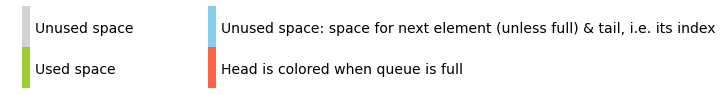

In [12]:
COLORS = [[COL_USED,"Used space"], [COL_UNUSED,"Unused space"], [COL_FULL,"Head is colored when queue is full"],
          [COL_NEXT,"Unused space: space for next element (unless full) & tail, i.e. its index"]]
plt.figure(figsize=(10, 1.5))
plt.axis([0, 30, 0, 2])
plt.axis('off')
for i in range(2):
    plot_interval(1, [i+OFFSET,i+OFFSET], COLORS[i][0])
    plt.text(1+OFFSET, i+OFFSET, COLORS[i][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
for i in range(2):
    plot_interval(11, [i+OFFSET,i+OFFSET], COLORS[i-2][0])
    plt.text(11+OFFSET, i+OFFSET, COLORS[i-2][1], verticalalignment='center_baseline', horizontalalignment='left', fontsize=FONTSIZE_LEGEND)
plt.show()

## Visualize

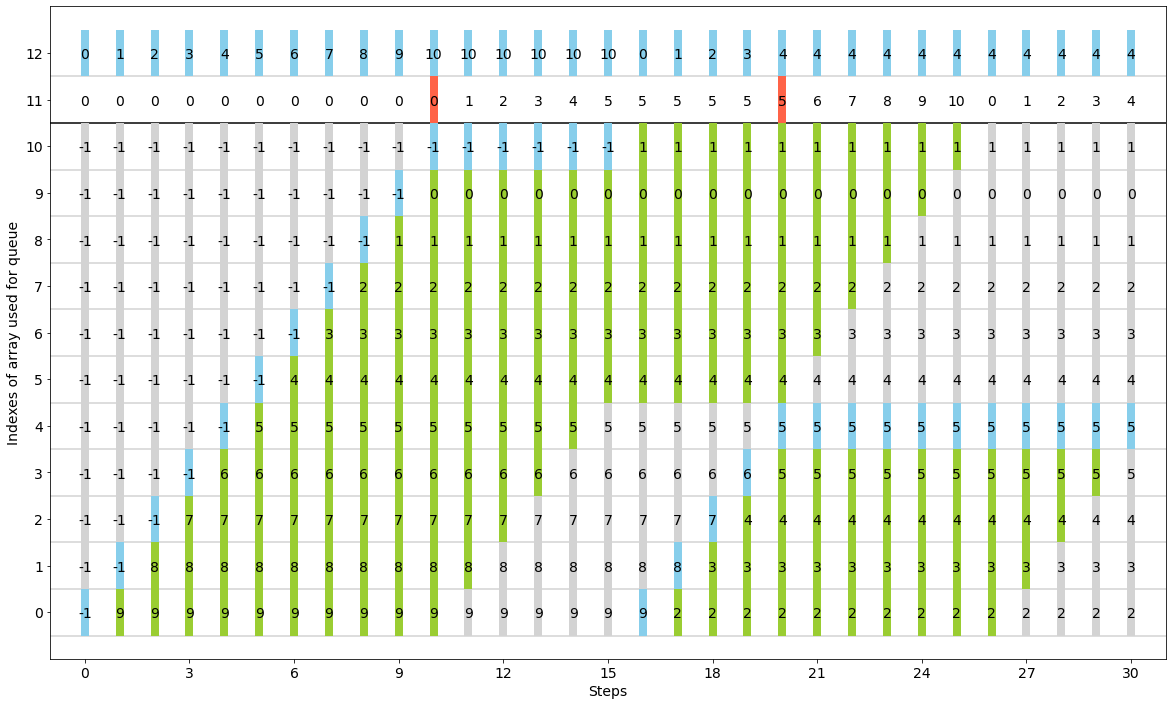

In [13]:
init_queue()
for i in range(MAX_NUM_ELEMENTS):
    enqueue(MAX_NUM_ELEMENTS-1-i)
for i in range(MAX_NUM_ELEMENTS//2):
    dequeue()
for i in range(MAX_NUM_ELEMENTS//2):
    enqueue(i+1)
for i in range(MAX_NUM_ELEMENTS):
    dequeue()
output_graphical_view(MAX_NUM_ELEMENTS)

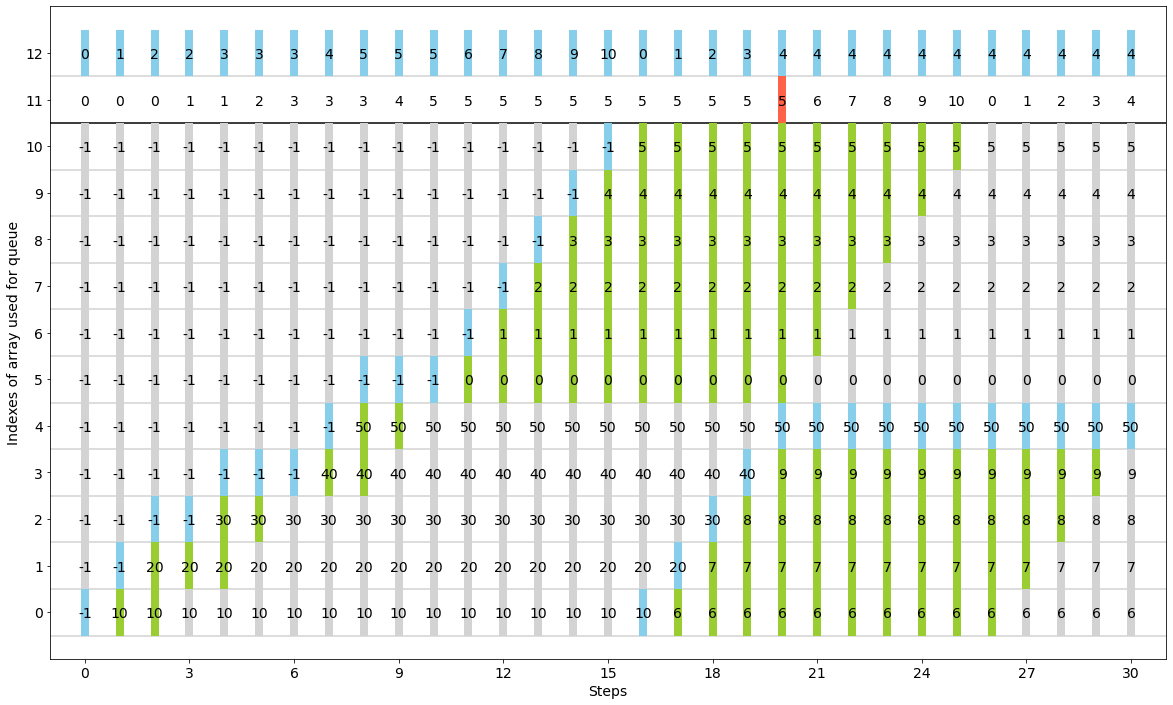

In [14]:
init_queue()
enqueue(10)
enqueue(20)
dequeue()
enqueue(30)
dequeue()
dequeue()
enqueue(40)
enqueue(50)
dequeue()
dequeue()
for i in range(MAX_NUM_ELEMENTS):
    enqueue(i)
for i in range(MAX_NUM_ELEMENTS):
    dequeue()
output_graphical_view(MAX_NUM_ELEMENTS)

### Your tests here ...

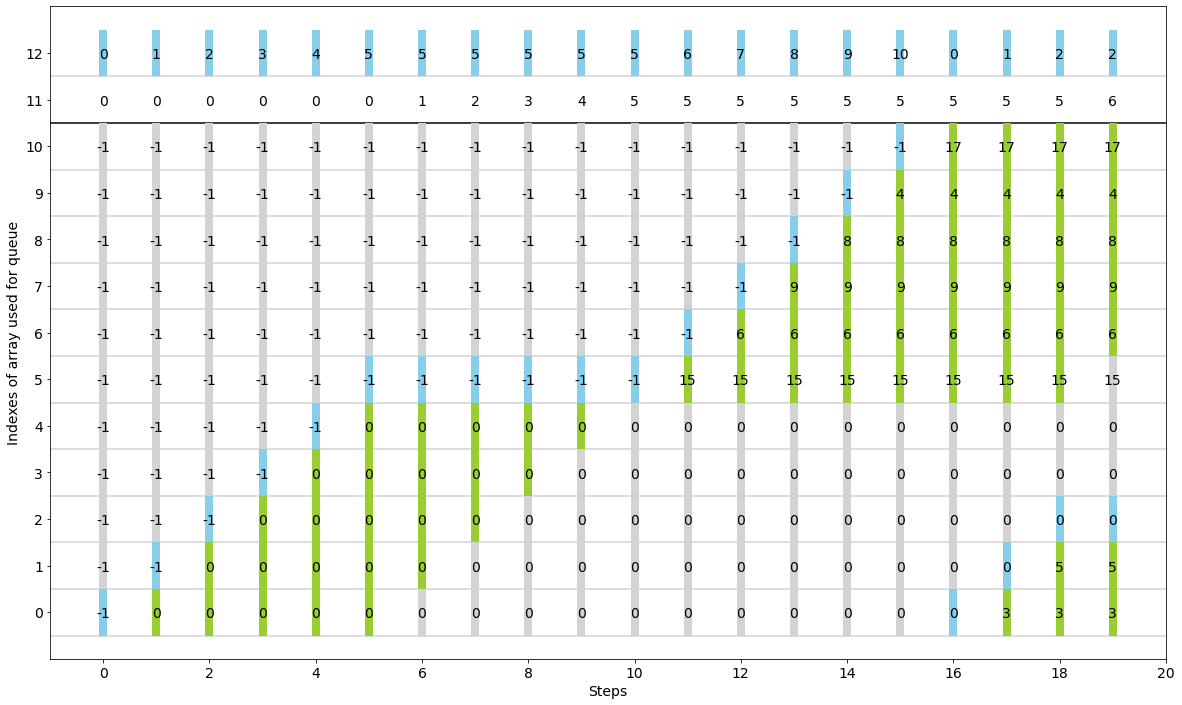

In [15]:
init_queue()
for i in range(5):
    enqueue(0)
for i in range(5):
    dequeue()
for i in [15,6,9,8,4,17,3,5]:
    enqueue(i)
dequeue()
output_graphical_view(MAX_NUM_ELEMENTS)

In [16]:
# ... and here ...